#  Hastane Randevu Problemi 

## datayı yükleme ve temel incelemle ve bilgiler alma 

In [51]:
import pandas as pd 
df=pd.read_csv("hospital_appointment_data.csv")
data=df.copy()

<img src="https://www.verywellhealth.com/thmb/AFn5nkyll986I8XeTQ-IOApRXQY=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/VWH-GettyImages-1406496671-d559150d3c294b8282f546c5bbf21157.jpg">

###                              kolonlar hakkında açıklama
AppointmentID: Randevunun benzersiz kimliği. 
    
PatientID: Hastanın benzersiz kimliği. 
    
AppointmentDate: Randevunun tarihi.
    
AppointmentTime: Randevunun saati. 
    
AppointmentDay: Randevunun günü. (örneğin, Pazartesi, Salı).
    
PatientAge: Hastanın yaşı.
    
PatientGender: Hastanın cinsiyeti.
    
Disease: Hastanın hastalığı veya rahatsızlığı.

DoctorID: Doktorun benzersiz kimliği. 
    
PreviousNoShow: Hastanın geçmişte randevuya gelmeme durumu. 
    
SMSReminder: SMS hatırlatıcı durumu.
    
NoShow: Hastanın randevuya gelip gelmediği.



**1-Veriler üzerinde yapılacak işlemler için gerekli kütüphaneleri yükleyin**

In [52]:
# Gerekli Kütüphaneler 
from sklearn.preprocessing import LabelEncoder  #  kategorik verileri numeric verilere dönüştürme 

import matplotlib.pyplot as plt # verileri görselleştirme kütüphanesi
import seaborn as sns # daha iyi bir görselleştirme kütüphanesi
import pandas as pd # Data işlemleri  için Kütüphane
import plotly.express as px
import warnings   # hataları görmezden geleme 
warnings.filterwarnings('ignore')



from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score  # scordeğerleri algoritmasi 
from sklearn.naive_bayes import  GaussianNB,BernoulliNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split  #veritler test ve train diye ayırmaya yarrıoyr 
from sklearn.ensemble import RandomForestClassifier   # 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [53]:
#!pip install pycaret


#  buraya AutoML üzerinden bir ön işlem yapamak isityorum
from pycaret.classification import *

setup(df,target='NoShow')

,Description,Value
0,Session id,4824
1,Target,NoShow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(1000, 12)"
5,Transformed data shape,"(1000, 40)"
6,Transformed train set shape,"(700, 40)"
7,Transformed test set shape,"(300, 40)"
8,Numeric features,5
9,Categorical features,6


In [54]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6643,0.4631,0.6643,0.4413,0.5303,0.0000,0.0000,1.1450
dt,Decision Tree Classifier,0.6643,0.5000,0.6643,0.4413,0.5303,0.0000,0.0000,0.8570
ridge,Ridge Classifier,0.6643,0.4562,0.6643,0.4413,0.5303,0.0000,0.0000,0.0270
rf,Random Forest Classifier,0.6643,0.4378,0.6643,0.4413,0.5303,0.0000,0.0000,0.0660
ada,Ada Boost Classifier,0.6643,0.5000,0.6643,0.4413,0.5303,0.0000,0.0000,0.0250
gbc,Gradient Boosting Classifier,0.6643,0.5000,0.6643,0.4413,0.5303,0.0000,0.0000,0.0420
lda,Linear Discriminant Analysis,0.6643,0.5000,0.6643,0.4413,0.5303,0.0000,0.0000,0.0230
et,Extra Trees Classifier,0.6643,0.5072,0.6643,0.4413,0.5303,0.0000,0.0000,0.0630
xgboost,Extreme Gradient Boosting,0.6643,0.4623,0.6643,0.4413,0.5303,0.0000,0.0000,0.0520
dummy,Dummy Classifier,0.6643,0.5000,0.6643,0.4413,0.5303,0.0000,0.0000,0.0250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
best_model=create_model('lr')
# Derin öğrenme ile daha yükseğe çıkabilir

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6714,0.4496,0.6714,0.4508,0.5394,0.0000,0.0000
1,0.6571,0.4801,0.6571,0.4476,0.5325,-0.0282,-0.0842
2,0.6429,0.5560,0.6429,0.4443,0.5255,-0.0555,-0.1200
3,0.6714,0.5217,0.6714,0.4508,0.5394,0.0000,0.0000
4,0.6714,0.4376,0.6714,0.4508,0.5394,0.0000,0.0000
5,0.6143,0.3379,0.6143,0.4217,0.5001,-0.0825,-0.1528
6,0.6571,0.4457,0.6571,0.4318,0.5212,0.0000,0.0000
7,0.6571,0.4792,0.6571,0.4318,0.5212,0.0000,0.0000
8,0.6714,0.4801,0.6714,0.7810,0.5531,0.0541,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

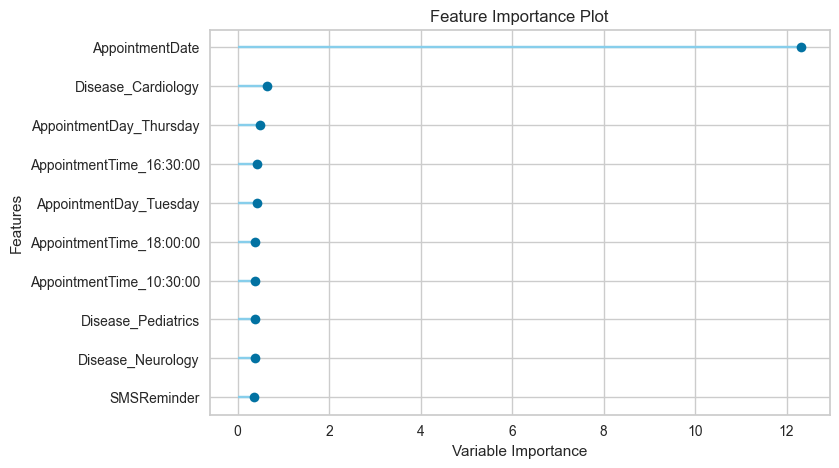

In [56]:
plot_model(best_model,plot='feature')

**2. Veri Keşfi ve Ön İşleme**

Veri Setinin İlk Bakış: Veri setini gözden geçirin ve ilk birkaç satırı inceleyin.

Eksik Veri Kontrolü: Eksik verileri kontrol edin ve gerekirse eksik verileri işleyin veya doldurun.

Veri Türlerinin Kontrolü: Her bir sütunun veri türlerini kontrol edin ve uygun dönüşümleri yapın.

Kategorik Değişkenlerin Kodlanması: Kategorik değişkenleri sayısal değerlere dönüştürün.


# Veri Ön İşlem 

In [57]:
df.head(7)  #head ilk 5 satırı inceler , eğer parametre veriseniz  parametreye göre ilksatırları inceler 

,AppointmentID,PatientID,AppointmentDate,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,SMSReminder,NoShow
0,1,1102,2023-01-01,15:00:00,Sunday,78,Male,Pediatrics,110,3,Yes,Yes
1,2,1435,2023-01-02,11:00:00,Monday,33,Male,General,152,3,Yes,No
2,3,1860,2023-01-03,09:00:00,Tuesday,35,Male,Orthopedics,145,0,Yes,Yes
3,4,1270,2023-01-04,09:00:00,Wednesday,5,Female,Cardiology,129,1,Yes,No
4,5,1106,2023-01-05,17:30:00,Thursday,38,Female,Pediatrics,156,0,Yes,Yes
5,6,1071,2023-01-06,16:00:00,Friday,41,Female,General,117,2,No,No
6,7,1700,2023-01-07,17:00:00,Saturday,57,Female,Cardiology,150,0,No,No


In [58]:
df.isnull().sum()  # datamızda eksik veri bulunmamaktadır 
#isnull ile boş değerleri sum ile ise toplamlarını alarak bakıyoruz 

AppointmentID      0
PatientID          0
AppointmentDate    0
AppointmentTime    0
AppointmentDay     0
PatientAge         0
PatientGender      0
Disease            0
DoctorID           0
PreviousNoShow     0
SMSReminder        0
NoShow             0
dtype: int64

In [59]:
df.info()   # datamız hakkında bir bilgilendirme alıyoruz  
# column bilgileri 
# boş değer adedi 
# ve Dtype ile verinin tipini görüyoruz 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AppointmentID    1000 non-null   int64 
 1   PatientID        1000 non-null   int64 
 2   AppointmentDate  1000 non-null   object
 3   AppointmentTime  1000 non-null   object
 4   AppointmentDay   1000 non-null   object
 5   PatientAge       1000 non-null   int64 
 6   PatientGender    1000 non-null   object
 7   Disease          1000 non-null   object
 8   DoctorID         1000 non-null   int64 
 9   PreviousNoShow   1000 non-null   int64 
 10  SMSReminder      1000 non-null   object
 11  NoShow           1000 non-null   object
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


In [60]:
df.describe() #sayısal değerler hakkında matematiksel bilgiler için kullanılan foksiyon .

,AppointmentID,PatientID,PatientAge,DoctorID,PreviousNoShow
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1503.929000,47.305000,150.206000,2.047000
std,288.819436,289.998108,29.217591,28.720279,1.400983
min,1.000000,1000.000000,0.000000,100.000000,0.000000
25%,250.750000,1242.750000,21.000000,124.750000,1.000000
50%,500.500000,1505.000000,45.500000,152.500000,2.000000
75%,750.250000,1757.250000,73.000000,175.000000,3.000000
max,1000.000000,1998.000000,99.000000,199.000000,4.000000


In [61]:
# Veri setin tür ayarlama ve dönüştürme 
#1. ön sıradaki verilere bakma 
df.head() # object verilerimizin hangilerini int64 e çevirmemiz gerektiğini görelim

#2. eksik veri kontrolu
df.isnull().sum() # ve ya  df.info() ile  kontrol edilebilir

#3. Tür kontrolüne göre tür dönüşümü 
    # dönüşecek türler # df.dtypes ile bakılabilir 
    #df.select_dtypes(['object'])  #object verileri görmüş olduk  

#4. Gerekli Sütünların türünü dönüştürme 
label_e=LabelEncoder()
      # 2 değerler için ( 0 ve 1 verir ) , 3 ve fazlasi 0 1 2 3 4 diye devam eder 

df['PatientGender'] = label_e.fit_transform(df['PatientGender'])  # cinsiyet
df['AppointmentDay'] = label_e.fit_transform(df['AppointmentDay'])# gün
df['Disease'] = label_e.fit_transform(df['Disease'])              #hastalık
df['AppointmentTime'] = label_e.fit_transform(df['AppointmentTime'])              #hastalık
    # Diğer tür dönüşümleri AppointmentTime
      # ben 2 yöntemle yaptım 2 sinide yapabilrisiniz 
df['SMSReminder']=df['SMSReminder'].map(lambda x: 1 if x == 'Yes' else 0) 
df['NoShow']=df['NoShow'].map({'No': 0, 'Yes': 1})  #Yes yerine 1 No yerine 0 yaz  ama sadece map ile 

# yes'e 1 no' 0  # sms nin null gibi bi değeri olmadığı için böyle yapmayı tercih ettim 
# tanbi label encoder ile de bu şekildfe bir işlem yapılabilir .
    
# 2 den fazla değer oldukları için bura'da get_dummies kullandık yani kukla değişken 
#df = pd.get_dummies(df, columns=['Disease'], drop_first=True)
#  kendi stünlarının attık sadece dummi leri buraktık 



In [62]:
df.head()  # basit bir göz atma .

,AppointmentID,PatientID,AppointmentDate,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,SMSReminder,NoShow
0,1,1102,2023-01-01,12,3,78,1,4,110,3,1,1
1,2,1435,2023-01-02,4,1,33,1,1,152,3,1,0
2,3,1860,2023-01-03,0,5,35,1,3,145,0,1,1
3,4,1270,2023-01-04,0,6,5,0,0,129,1,1,0
4,5,1106,2023-01-05,17,4,38,0,4,156,0,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AppointmentID    1000 non-null   int64 
 1   PatientID        1000 non-null   int64 
 2   AppointmentDate  1000 non-null   object
 3   AppointmentTime  1000 non-null   int32 
 4   AppointmentDay   1000 non-null   int32 
 5   PatientAge       1000 non-null   int64 
 6   PatientGender    1000 non-null   int32 
 7   Disease          1000 non-null   int32 
 8   DoctorID         1000 non-null   int64 
 9   PreviousNoShow   1000 non-null   int64 
 10  SMSReminder      1000 non-null   int64 
 11  NoShow           1000 non-null   int64 
dtypes: int32(4), int64(7), object(1)
memory usage: 78.3+ KB


**3. Veri Görselleştirme**

Hastane Randevu Dağılımı: Randevuların tarih, saat, cinsiyet, hastalık vb. özelliklere göre dağılımını görselleştirin.

No-Show Oranı: No-show (randevuya gelmeme) oranlarını görselleştirin ve faktörler arasındaki ilişkiyi inceleyin.

Korelasyon Matrisi: Değişkenler arasındaki ilişkiyi göstermek için bir korelasyon matrisi oluşturun.


# Veri Görselleştirme 

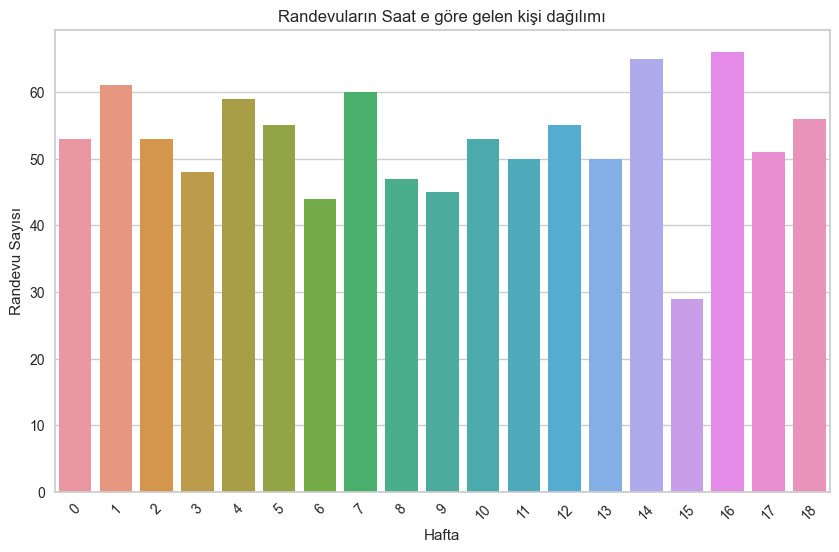

In [64]:
# Tarih Dağılımı (örneğin, ay bazında)
plt.figure(figsize=(10, 6))
sns.countplot(x=df.AppointmentTime, data=df)
plt.title('Randevuların Saat e göre gelen kişi dağılımı')
plt.xlabel('Hafta')
plt.ylabel('Randevu Sayısı')
plt.xticks(rotation=45)
plt.show()


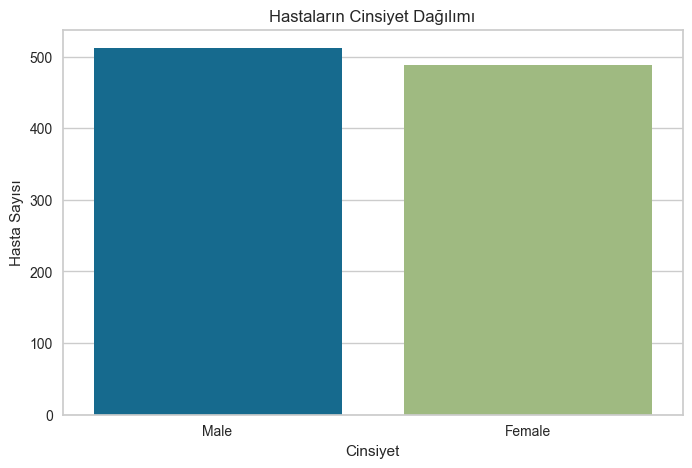

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PatientGender', data=data)
plt.title('Hastaların Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Hasta Sayısı')
plt.show()

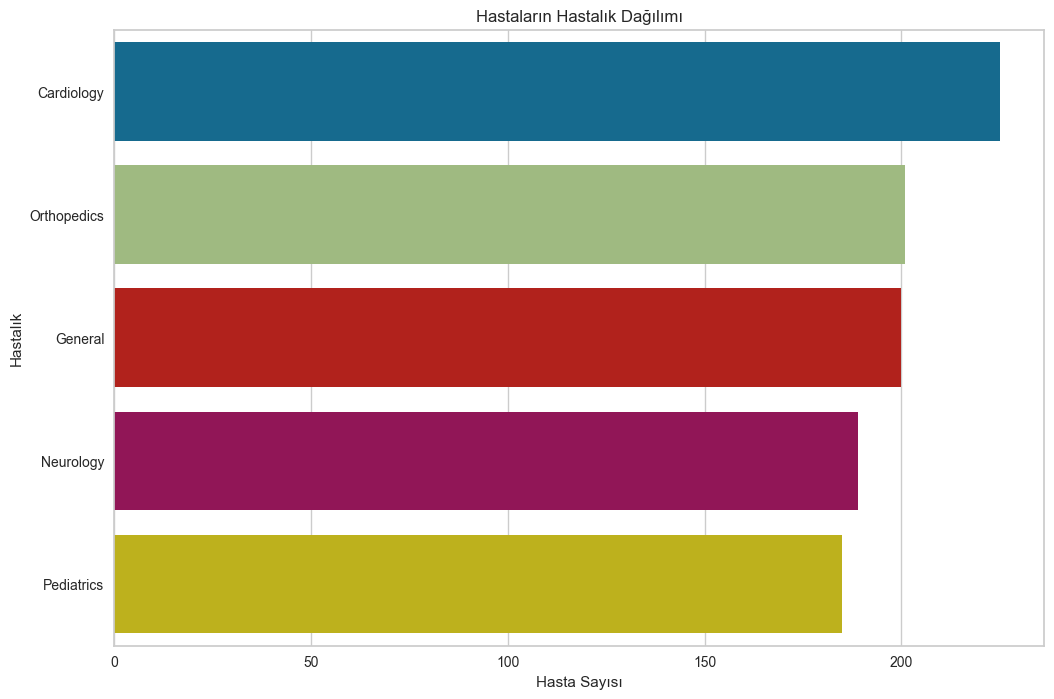

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Disease', data=data, order=data['Disease'].value_counts().index)
plt.title('Hastaların Hastalık Dağılımı')
plt.xlabel('Hasta Sayısı')
plt.ylabel('Hastalık')
plt.show()

In [67]:
# Cinsiyet Dağılımı  
plt.figure(figsize=(13,6));
count_show = data['NoShow'].value_counts()  # yes ve no var zaten 

fig = px.bar(x=count_show.index,
             y=count_show.values,
             color=count_show.index,
             labels={'x': 'Geldi mi', 'y': 'Toplam Sayı'},
             title='Cinsiyet Dağılımı',
             template='plotly_white');
fig.show()

<Figure size 1300x600 with 0 Axes>

In [68]:
df.shape
data.shape
data.columns

Index(['AppointmentID', 'PatientID', 'AppointmentDate', 'AppointmentTime',
       'AppointmentDay', 'PatientAge', 'PatientGender', 'Disease', 'DoctorID',
       'PreviousNoShow', 'SMSReminder', 'NoShow'],
      dtype='object')

<Axes: xlabel='NoShow', ylabel='AppointmentDay'>

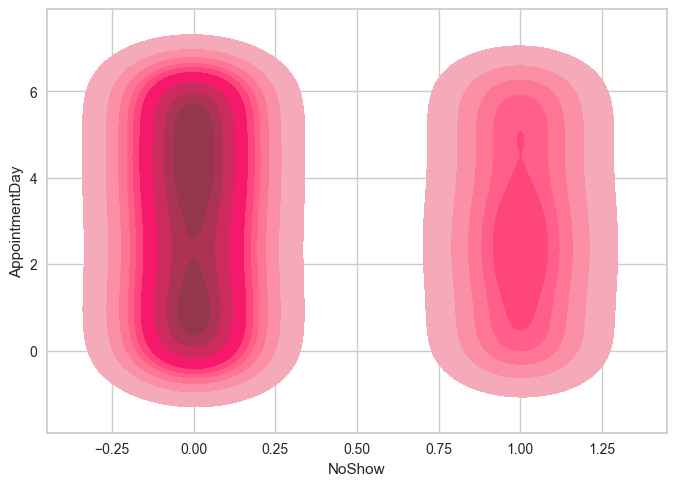

In [69]:
# burada haftanın günlerine göre  gösterenle göstermeyenleri yaptık kde plot ile

sns.kdeplot(x=df.NoShow,y=df.AppointmentDay,fill=True,color="pink")

In [70]:
g_s_c = data.groupby(['PatientGender', 'NoShow']).size().reset_index(name='count')

fig = px.bar(g_s_c, 
             x='PatientGender', 
             y='count',
             color='NoShow',
             labels={'PatientGender': 'Cinsiyet',
                     'count': 'Toplam Sayı',
                     'NoShow': 'Geldi mi'},
             title='Cinsiyet ve Gelme Durumu Dağılımı',
             template='plotly_white',
             color_discrete_map={'Yes': '#FF5733',# renk haritasi
                                 'No': '#3498DB'})

# Grafik gösterimini iyileştirme
fig.update_layout(barmode='group')

fig.show()

In [71]:
# Plotly ile pasta grafiği (pie chart) oluşturma
# cinsiyet dağılımı 
cnt_gndr = data['PatientGender'].value_counts()

fig = px.pie(names=cnt_gndr.index,
             values=cnt_gndr.values,
             title='Cinsiyet Dağılımı',
             
             labels={'names': 'Cinsiyet',
                     'values': 'Toplam Sayı'},
             
             template='plotly_white')
fig.show()

In [72]:
# Plotly ile pasta grafiği (pie chart) oluşturma

# gelip gelmeme dağılımı 
gelmeme = data['NoShow'].value_counts()

fig = px.pie(names=gelmeme.index,
             values=gelmeme.values,
             title='NoShow Dağılımı',
             
             labels={'names': 'Gelme',
                     'values': 'Toplam Sayı'},
             
             template='plotly_white')
fig.show()

In [73]:
data.columns

Index(['AppointmentID', 'PatientID', 'AppointmentDate', 'AppointmentTime',
       'AppointmentDay', 'PatientAge', 'PatientGender', 'Disease', 'DoctorID',
       'PreviousNoShow', 'SMSReminder', 'NoShow'],
      dtype='object')

In [74]:
hafta_kisi = data.groupby(['AppointmentDay', 'NoShow']).size().reset_index(name='count')

# Plotly ile bar grafiği oluşturma
fig = px.bar(hafta_kisi, 
             x='AppointmentDay',
             y='count', color='NoShow',
             labels={'AppointmentDay': 'Gün',
                     'count': 'Toplam Sayı',
                     'NoShow': 'Gelme Durumu'},
             
             title='Haftalık Randevu Dağılımı ve NoShow Durumu',
             template='plotly_dark',
             color_discrete_map={False: '#1f77b4', True: '#ff7f0e'})  # Renklerin belirtilmesi

fig.show()

In [75]:
count_dis = data['Disease'].value_counts() #hasta türe göre sayisi 

# Plotly ile hastalık dağılımını görselleştirme
fig=px.bar(x=count_dis.index,  #6 indexi var
           y=count_dis.values, # sayisi 
           color=count_dis.index, # rekleri yine sayisina göre
           labels={'x': 'Hastalık','y': 'Toplam Sayı'}, #label yazdırma
           title='Hastalık Dağılımı', #başlık 
           template='plotly_dark') # arkapılan 

fig.show()

In [76]:
# Hastalığa göre gelip gelmeme durumuna göre gruplama
hastalik_gelme = data.groupby(['Disease', 'NoShow']).size().reset_index(name='count')

# Plotly ile bar grafiği oluşturma
fig = px.bar(hastalik_gelme, 
             x='Disease',
             y='count',
             color='NoShow',
             labels={'Disease': 'Hastalık', 'count': 'Toplam Sayı',
                     'NoShow': 'Gelme Durumu'},
             title='Hastalığa Göre Gelme Durumu',
             template='plotly_dark',
             color_discrete_map={1: '#1f77b4', 0: '#ff5733'})
fig.show()

In [77]:
# Hastalık bazında sayıları hesapla
hasta_sayi = data['Disease'].value_counts()

# Plotly ile pasta grafiği (pie chart) oluşturma
fig = px.pie(names=hasta_sayi.index,  # isim yerine index lerini
             values=hasta_sayi.values, # index yerlerinede kisi sayisini
             title='Hastalık Dağılımı Oranlı:', # başlık
             labels={'names': 'Hastalık',
                     'values': 'Toplam Sayı'},  #labellerimiz
             template='plotly_white') # arkaplan rengi
fig.show()  # yapılanı gösterme 

In [78]:
# Tarih, hastalık, cinsiyet bazında sayıları hesapla
count = data.groupby(['PatientGender','Disease','AppointmentDay',  'AppointmentDate','NoShow']).size().reset_index(name='count')
# count ta biz diyoruz ki datamızın şu değerlerini alsın 

# Plotly ile sunburst grafiği oluşturma
fig = px.sunburst(count,
                  path=['NoShow',       #path ta şu sıralma ile yap diyoruz 
                        'PatientGender',
                        'Disease',
                        'AppointmentDay',
                        'AppointmentDate'],
                  values='count',
                  title='Hastane Randevu Dağılımı',
                  template='plotly_dark')
fig.show()

## korelasyon 

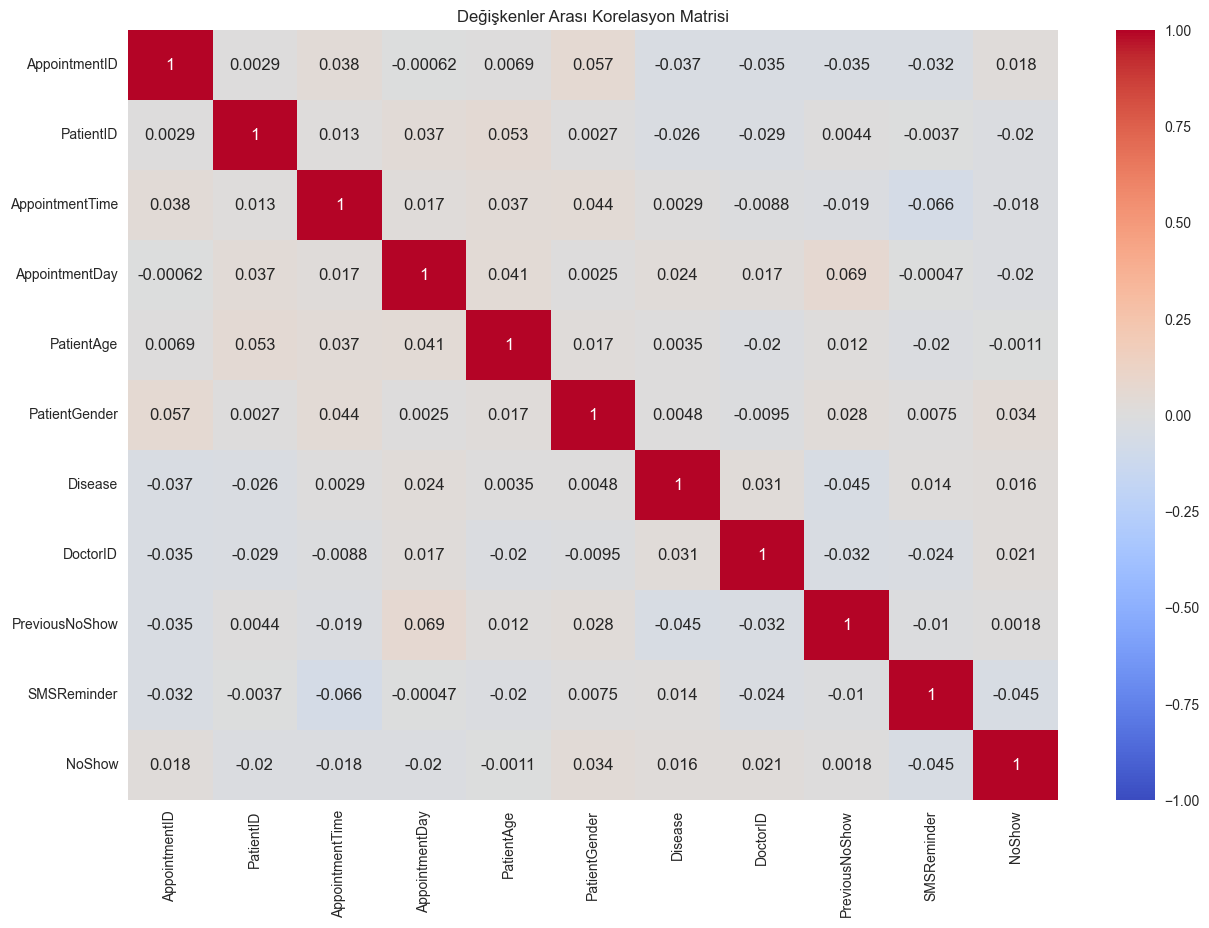

In [79]:
# Korelasyon matrisi hesaplama
corr_matrix = df.corr(numeric_only=True)

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

# burada Korelasyonu en çok etlkileyen başaka neler var bakmak gerekiyor

**4. Veri Ön İşleme ve Sayısallaştırma**

Kategorik Değişkenlerin Kodlanması: Kategorik değişkenleri sayısal değerlere dönüştürün (örneğin, one-hot encoding veya label encoding).

Özellik Seçimi: Model için önemli olabilecek özellikleri seçin.

Veri Normalizasyonu: Sayısal özellikleri normalize edin.


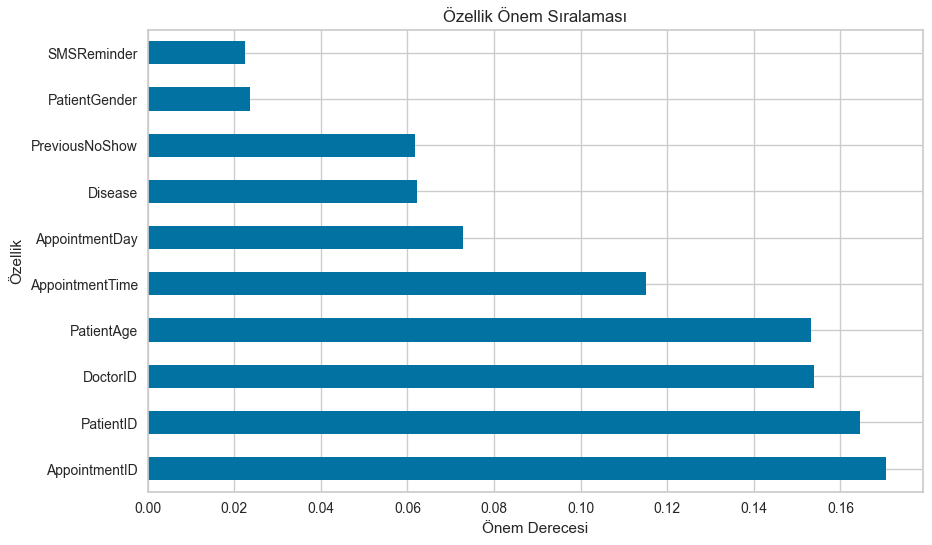

In [80]:
x = df.drop(columns=['NoShow','AppointmentDate'])  # Hedef değişken hariç tüm özellikler
y = df['NoShow']  # Hedef değişken

# RandomForestClassifier ile özellik önem sıralamasını alalım
rf = RandomForestClassifier(random_state=42)
rf.fit(x, y)

# Özellik önem sıralamasını görselleştirelim
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Özellik Önem Sıralaması')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellik')
plt.show()

In [81]:
# Normalizasion 
 # nedeni  :
        #Farklı Ölçeklerdeki Değerleri Karşılaştırılabilir Hale Getirme: Veri setindeki farklı özellikler genellikle farklı ölçeklerde olabilir. Örneğin, bir özellik binlerce dolar değerinde olabilirken, diğer özellik yalnızca birkaç birimlik bir sayısal aralığa sahip olabilir. Bu durumda, özellikler arasında doğru bir karşılaştırma yapmak zor olabilir. Normalizasyon, tüm özellikleri aynı ölçekte ifade ederek, algoritmaların bu özellikler üzerinde dengeli bir şekilde çalışmasını sağlar.

# Min-Max scaling ile sayısal özellikleri normalize edelim        
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)
# Normalize edilmiş özellikleri DataFrame olarak saklayabiliriz
x_normalized = pd.DataFrame(x_scaler, columns=x.columns)
x_normalized.head()

,AppointmentID,PatientID,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,SMSReminder
0,0.000000,0.102204,0.666667,0.500000,0.787879,1.0,1.00,0.101010,0.75,1.0
1,0.001001,0.435872,0.222222,0.166667,0.333333,1.0,0.25,0.525253,0.75,1.0
2,0.002002,0.861723,0.000000,0.833333,0.353535,1.0,0.75,0.454545,0.00,1.0
3,0.003003,0.270541,0.000000,1.000000,0.050505,0.0,0.00,0.292929,0.25,1.0
4,0.004004,0.106212,0.944444,0.666667,0.383838,0.0,1.00,0.565657,0.00,1.0


In [82]:
# Dumy Varible 
df = pd.get_dummies(df, columns=['AppointmentDay', 'PatientGender', 'Disease'], drop_first=True)

In [83]:
x=df.drop('NoShow',axis=1) # 
y=df['NoShow']
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=42,test_size=0.2)



**5. Model Oluşturma ve Değerlendirme**

Veri Setinin Bölünmesi: Veri setini eğitim ve test kümelerine ayırın.

Model Seçimi: Uygun bir model seçin (örneğin, Logistic Regression, Decision Trees, Random Forest vb.).

Model Eğitimi: Seçilen modeli eğitin.

Model Değerlendirmesi: Modelin performansını değerlendirin (örneğin, doğruluk, hassasiyet, geri çağırma gibi metrikler kullanarak).

In [84]:
df.columns

Index(['AppointmentID', 'PatientID', 'AppointmentDate', 'AppointmentTime',
       'PatientAge', 'DoctorID', 'PreviousNoShow', 'SMSReminder', 'NoShow',
       'AppointmentDay_1', 'AppointmentDay_2', 'AppointmentDay_3',
       'AppointmentDay_4', 'AppointmentDay_5', 'AppointmentDay_6',
       'PatientGender_1', 'Disease_1', 'Disease_2', 'Disease_3', 'Disease_4'],
      dtype='object')

# Verileri Bölme ve Model Oluşumu 

In [85]:
x = df.drop(columns=['NoShow','AppointmentDate'])  # Hedef değişken hariç 
#x=x_scaler
y = df['NoShow']  # Hedef değişken

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

print(x_train.shape,x_test.shape)  #verimizin sayisi ve doğru böldükmü kontrolu

(800, 18) (200, 18)


In [86]:
# Model oluşumu 
model = RandomForestClassifier(random_state=42)
# Öğrenme
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [87]:
# Tahmin
y_tahmin = model.predict(x_test)

# Modelin performansını değerlendirelim
accuracy = accuracy_score(y_test, y_tahmin)
precision = precision_score(y_test, y_tahmin)
recall = recall_score(y_test, y_tahmin)


print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("Geri Çağırma (Recall): {:.2f}".format(recall))

Doğruluk (Accuracy): 0.66
Hassasiyet (Precision): 0.10
Geri Çağırma (Recall): 0.02


In [88]:
g=GaussianNB()
b=BernoulliNB()

b.fit(x_train,y_train)
g.fit(x_train,y_train)

g_predic=g.predict(x_test)
b_predict=b.predict(x_test)

accuracy_score(g_predic,y_test)
accuracy_score(b_predict,y_test)

##Confusion matrix (karmaşıklık matrisi), sınıflandırma modelinin performansını değerlendirmek için kullanılan bir araçtır. 
#Basitçe, modelin tahminlerini gerçek sınıflarla 
#karşılaştırarak sınıflandırma hatalarını ve doğruluğunu gösteren bir tablodur.

sonuc_c_g=confusion_matrix(g_predic,y_test)
sonuc_c_b=confusion_matrix(b_predict,y_test)

sonuc2=classification_report(g_predic,y_test)
sonuc3=classification_report(b_predict,y_test)
##classification_report, bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir 
#raporlama aracıdır. Genellikle sınıflandırma problemleri için doğruluk (accuracy), 
#hassasiyet (precision), geri çağırma (recall) ve F1-score gibi metriklerle birlikte kullanılır

print(sonuc2)
print(sonuc3)

print("C_matrix g \n",sonuc_c_g)
print("C_matrix b \n",sonuc_c_b)

              precision    recall  f1-score   support

           0       0.91      0.70      0.80       182
           1       0.10      0.33      0.15        18

    accuracy                           0.67       200
   macro avg       0.51      0.52      0.47       200
weighted avg       0.84      0.67      0.74       200

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       199
           1       0.00      0.00      0.00         1

    accuracy                           0.69       200
   macro avg       0.50      0.35      0.41       200
weighted avg       0.99      0.69      0.82       200

C_matrix g 
 [[128  54]
 [ 12   6]]
C_matrix b 
 [[139  60]
 [  1   0]]


In [89]:
# Diyer Algoritmalar .
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}
for clf_name, clf in classifiers.items():
    clf.fit(x_train, y_train)  # Modeli eğit
    y_pred = clf.predict(x_test)  # Test seti üzerinde tahmin yap
    
    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    clas_rapor = classification_report(y_test, y_pred)  # Sınıflandırma raporunu oluştur
    
    # Sonuçlar
    print(f"---- {clf_name} ----")
    print(f"Doğruluk (Accuracy): {accuracy:.2f}")
    print(f"Hassasiyet (Precision): {precision:.2f}")
    print(f"Geri Çağırma (Recall): {recall:.2f}")
    
    print("\nRapor (Classification Report):")
    print(clas_rapor)
    print()


---- Decision Tree ----
Doğruluk (Accuracy): 0.52
Hassasiyet (Precision): 0.26
Geri Çağırma (Recall): 0.33

Rapor (Classification Report):
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       140
           1       0.26      0.33      0.29        60

    accuracy                           0.52       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.55      0.52      0.53       200


---- Gradient Boosting ----
Doğruluk (Accuracy): 0.66
Hassasiyet (Precision): 0.30
Geri Çağırma (Recall): 0.12

Rapor (Classification Report):
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       140
           1       0.30      0.12      0.17        60

    accuracy                           0.66       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.58      0.66      0.60       200


---- SVC ----
Doğruluk (Accuracy): 0.70
Hassasiyet (Precision)

In [93]:
# Deep Learning ile karşılaştıralım sonuçları

In [105]:
# Gerekli kütüphaneleri yükleme
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Veriyi yükleme ve ön işleme
df = pd.read_csv("hospital_appointment_data.csv")

x = df.drop("NoShow", axis=1)
y = df[['NoShow']]

# Kategorik verileri one-hot encoding ile sayısal verilere çevirme
x = pd.get_dummies(x, drop_first=True)

# Hedef değişkeni sayısal formata dönüştürme
y = y.replace({'NoShow': {'Yes': 1, 'No': 0}})  # 'Yes' -> 1, 'No' -> 0

# Veriyi ölçeklendirme
scale = StandardScaler()
x = scale.fit_transform(x)

# Veriyi eğitim ve test setlerine ayırma
x1, x2, y1, y2 = train_test_split(x, y, random_state=42, test_size=0.3)

In [107]:
# Model oluşturma
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(x1.shape[1],)))  # input layer
model.add(Dense(units=128, activation='relu'))  
model.add(Dense(units=64, activation='relu'))  # hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.5))  # dropout layer
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # output layer

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(x1, y1, epochs=15, batch_size=15, validation_data=(x2, y2), verbose='auto')

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5312 - loss: 0.6935 - val_accuracy: 0.6967 - val_loss: 0.6147
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6524 - loss: 0.6315 - val_accuracy: 0.6967 - val_loss: 0.6182
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7351 - loss: 0.4844 - val_accuracy: 0.6633 - val_loss: 0.7542
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8893 - loss: 0.2395 - val_accuracy: 0.6200 - val_loss: 0.9061
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9631 - loss: 0.0756 - val_accuracy: 0.6600 - val_loss: 1.2869
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0242 - val_accuracy: 0.6633 - val_loss: 1.9044
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0357 - val_accuracy: 0.6567 - val_loss: 2.4523
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0102 - val_accuracy: 0.6733 - val_loss

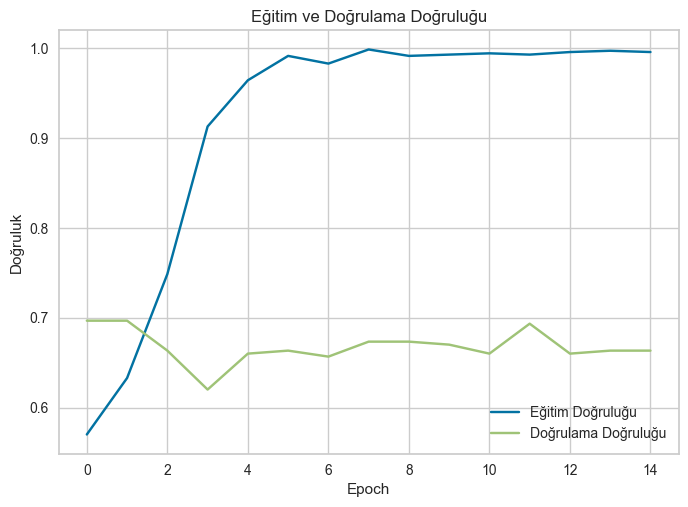

In [110]:
# Eğitim ve doğrulama kayıplarını ve doğruluklarını görselleştirme
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()


In [112]:
 # Overfiting yaşandı.
 
 ## Sonuç olarak datamız ile gelen ve gelmeyenleri sınıflandırarak  ne ye göre gelmeyeceğini ve verimizi analiz edeerk dağılımları gördük